In [29]:
import pandas as pd # módulo para tratamiento de datos
import numpy as np # módulo para tratamiento de matrices
import missingno as msno # librería para tratamiento de datos perdidos
import matplotlib.pyplot as plt # módulo graficador

EJEMPLO 1

In [30]:
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

bateos2 = [5985,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5002, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

In [31]:
datos=pd.DataFrame({'equipos':equipos,'bateos':bateos,'bateos2':bateos2,'runs':runs})

In [32]:
datos.head(5)

,equipos,bateos,bateos2,runs
0,Texas,5659,5985,855
1,Boston,5710,5710,875
2,Detroit,5563,5563,787
3,Kansas,5672,5672,730
4,St.,5532,5532,762


In [33]:
datos.shape

(30, 4)

In [34]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribucion de bateos y runs')

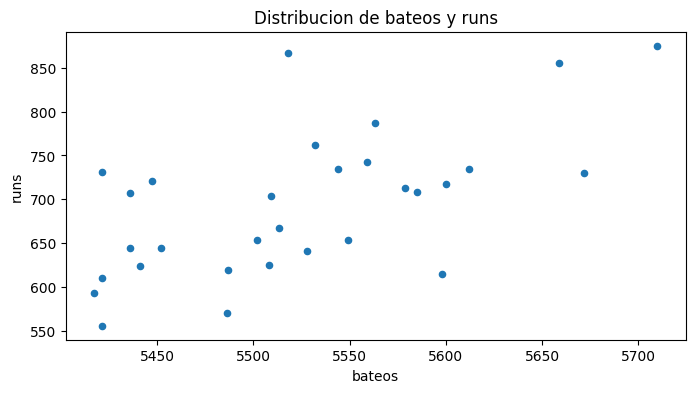

In [35]:
fig,ax=plt.subplots(figsize=(8,4))
datos.plot(
    x='bateos',
    y='runs',
    kind='scatter',
    ax=ax
)
ax.set_title('Distribucion de bateos y runs')

In [36]:
from scipy.stats import pearsonr

In [37]:
corr=pearsonr(x=datos['bateos'],y=datos['runs'])

In [38]:
print('coef corr pearson',corr[0])

coef corr pearson 0.6106270467206688


In [39]:
import seaborn as sns

In [40]:
datos.head(4)

,equipos,bateos,bateos2,runs
0,Texas,5659,5985,855
1,Boston,5710,5710,875
2,Detroit,5563,5563,787
3,Kansas,5672,5672,730


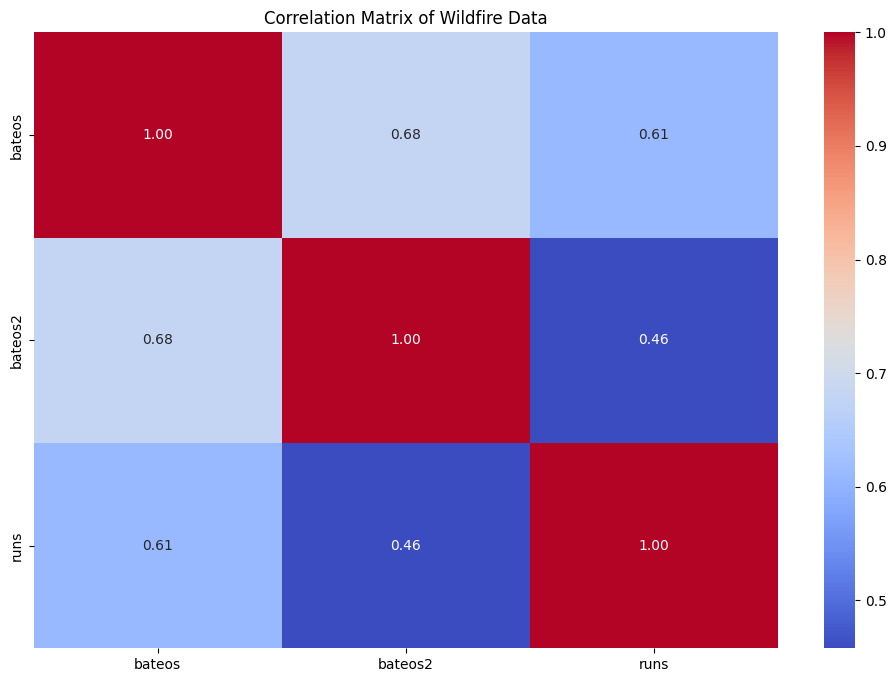

In [41]:
# Compute the correlation matrix for the numeric columns
correlation_matrix = datos.drop(['equipos'],axis=1).corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Wildfire Data')
plt.show()

**FORMA 1**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X

,bateos,bateos2
0,5659,5985
1,5710,5710
2,5563,5563
3,5672,5672
4,5532,5532
5,5600,5600
6,5518,5518
7,5447,5447
8,5544,5544
9,5598,5598


Regresión lineal múltiple

In [44]:
X=datos[['bateos','bateos2']]
y=datos['runs']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
modelo=LinearRegression()
modelo.fit(X_train,y=y_train)

LinearRegression()

In [48]:
print("Intercepto:",modelo.intercept_)

Intercepto: -2654.3362571740868


In [49]:
modelo.coef_.flatten()

array([0.37985204, 0.22719357])

In [50]:
predicciones=modelo.predict(X=X_test)

In [51]:
predicciones

array([675.91600293, 732.3712454 , 655.27645192, 574.69091007,
       711.12464877, 743.90511214])

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

coeficiente de determinacion

In [53]:
r2 = r2_score(y_test, predicciones)

In [54]:
r2

-1.2096862638349308

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [62]:
mse=mean_squared_error(
    y_true=y_test,
    y_pred=predicciones
)

In [63]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 7601.0752268961805
R^2 Score: -1.2096862638349308


**FORMA 2**

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X=datos[['bateos']]
y=datos['runs']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
modelo=LinearRegression()
modelo.fit(X_train,y=y_train)

LinearRegression()

In [69]:
print("Intercepto:",modelo.intercept_)

Intercepto: -2981.517212576021


In [70]:
modelo.coef_.flatten()

array([0.66685087])

In [71]:
predicciones=modelo.predict(X=X_test)

In [72]:
predicciones

array([676.82663312, 738.84376357, 654.15370371, 692.16420301,
       715.50398329, 751.51393   ])

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [78]:
mse=mean_squared_error(
    y_true=y_test,
    y_pred=predicciones,
)

In [79]:
mse

5219.975632116472

In [80]:
r2 = r2_score(y_test, predicciones)

In [81]:
r2

-0.5174837911123824

In [82]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 5219.975632116472
R^2 Score: -0.5174837911123824


**FORMA 3**

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X

,bateos
0,5659
1,5710
2,5563
3,5672
4,5532
5,5600
6,5518
7,5447
8,5544
9,5598


In [85]:
X=datos[['runs']]
y=datos['runs']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
modelo=LinearRegression()
modelo.fit(X_train,y=y_train)

LinearRegression()

In [89]:
print("Intercepto:",modelo.intercept_)

Intercepto: 0.0


In [90]:
modelo.coef_.flatten()

array([1.])

In [91]:
predicciones=modelo.predict(X=X_test)

In [92]:
predicciones

array([570., 713., 645., 704., 735., 615.])

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [100]:
mse=mean_squared_error(
    y_true=y_test,
    y_pred=predicciones,
)

In [101]:
mse

0.0

In [102]:
r2 = r2_score(y_test, predicciones)

In [103]:
r2

1.0

In [104]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.0
R^2 Score: 1.0


EJEMPLO 2

In [105]:
import pandas as pd
df2 = pd.DataFrame({ 'precio': [45, 53, 60, 42, 34],
                      'color': ['rojo', 'verde', 'azul', 'verde', 'rojo'] })
df2

,precio,color
0,45,rojo
1,53,verde
2,60,azul
3,42,verde
4,34,rojo


In [106]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   precio  5 non-null      int64 
 1   color   5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [107]:
dummies_df2 = pd.get_dummies(df2)
dummies_df2

,precio,color_azul,color_rojo,color_verde
0,45,False,True,False
1,53,False,False,True
2,60,True,False,False
3,42,False,False,True
4,34,False,True,False


In [108]:
dummies_drop_df2 = pd.get_dummies(df2, drop_first=True)
dummies_drop_df2

,precio,color_rojo,color_verde
0,45,True,False
1,53,False,True
2,60,False,False
3,42,False,True
4,34,True,False


In [109]:
dummies_drop_df2.dtypes

,0
precio,int64
color_rojo,bool
color_verde,bool


In [110]:
dummies_drop_df2.corr()

,precio,color_rojo,color_verde
precio,1.000000,-0.664076,0.063678
color_rojo,-0.664076,1.000000,-0.666667
color_verde,0.063678,-0.666667,1.000000


In [111]:
df2.shape

(5, 2)

In [112]:
df2.isna().sum()/df2.shape[0]*100

,0
precio,0.0
color,0.0


<Axes: >

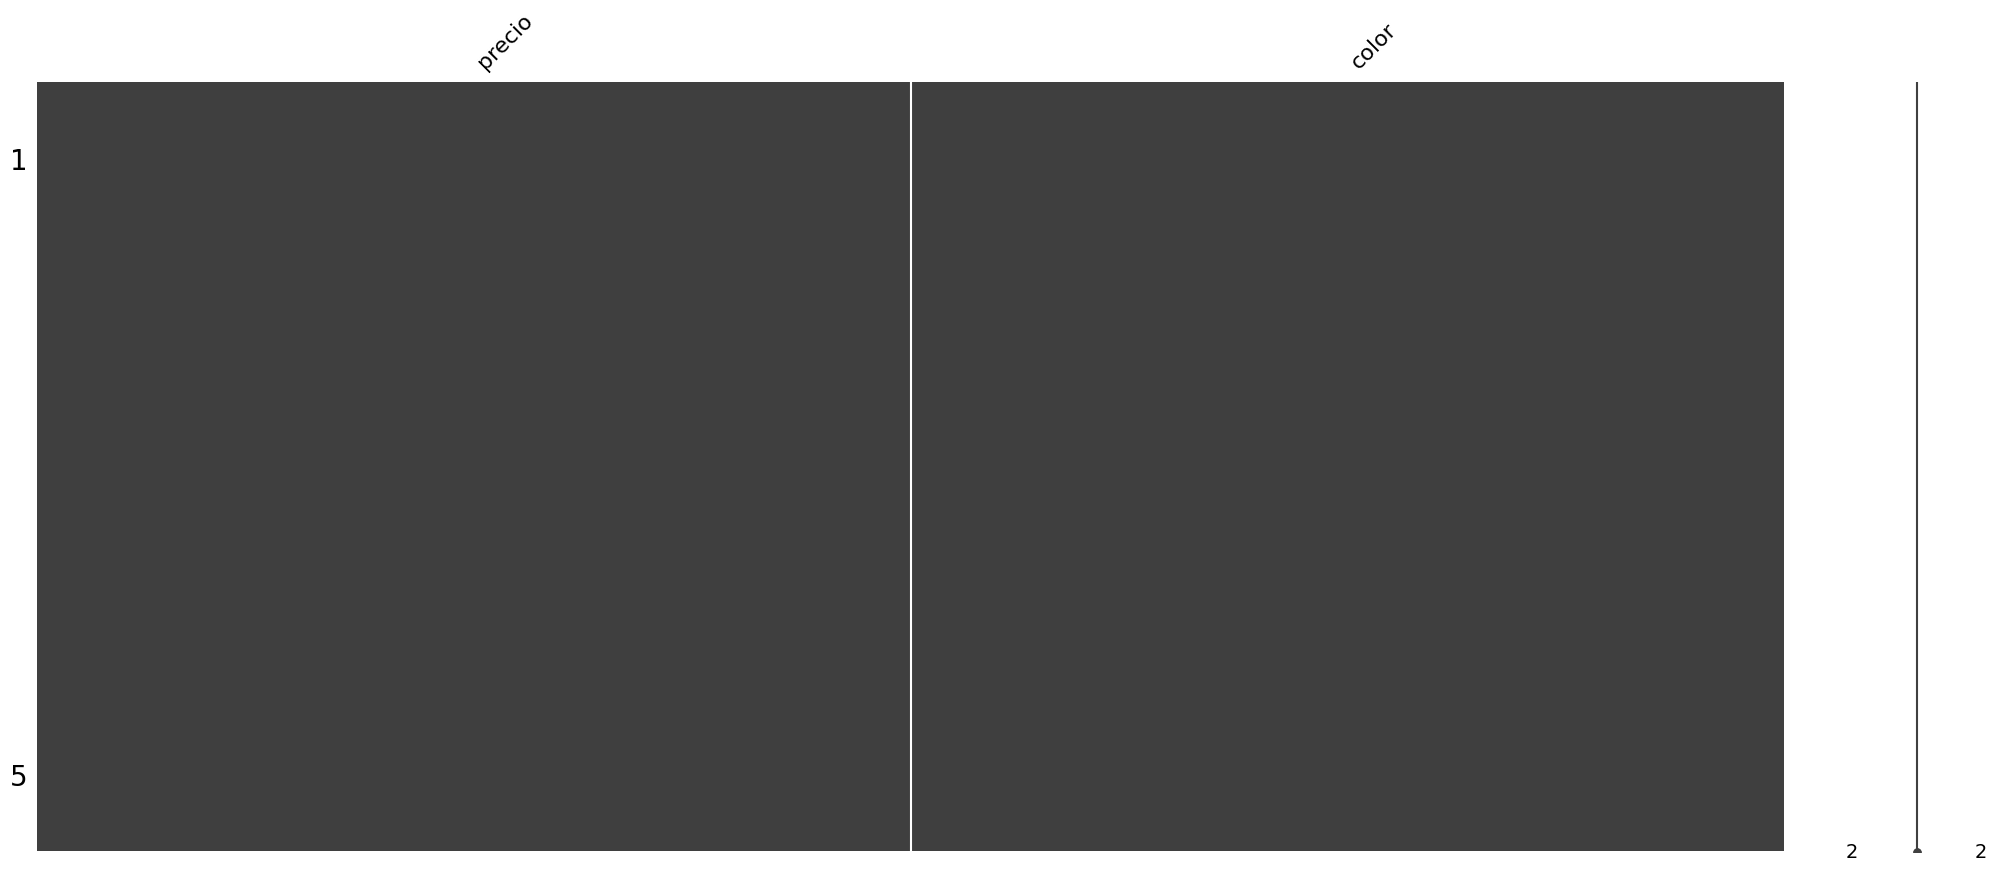

In [113]:
msno.matrix(df2)